In [13]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


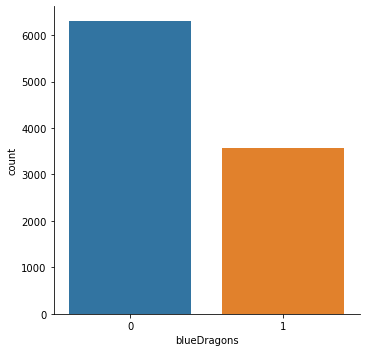

In [15]:
import seaborn as sns
sns.catplot(data=df, kind='count', x='blueDragons')

In [39]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [139]:
y = df['blueWins'].to_numpy() # output
x = df.drop(['blueWins', 'gameId', 'blueWardsPlaced', 'blueWardsDestroyed', 'redWardsPlaced', 'redWardsDestroyed'], axis=1).to_numpy() # input
# x = df[['blueKills', 'redKills', 'blueGoldDiff', 'blueDragons', 'redDragons', 'blueExperienceDiff', 'blueEliteMonsters', 'redEliteMonsters']].to_numpy() # input
x = x.T
x

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.0000e+00, 5.0000e+00, 7.0000e+00, ..., 6.0000e+00, 2.0000e+00,
        6.0000e+00],
       [6.0000e+00, 5.0000e+00, 1.1000e+01, ..., 7.0000e+00, 3.0000e+00,
        6.0000e+00],
       ...,
       [8.0000e+00, 1.1730e+03, 1.0330e+03, ..., 1.8770e+03, 1.0850e+03,
        5.8000e+01],
       [1.9700e+01, 2.4000e+01, 2.0300e+01, ..., 2.6100e+01, 2.4700e+01,
        2.0100e+01],
       [1.6567e+03, 1.7620e+03, 1.7285e+03, ..., 1.8319e+03, 1.5298e+03,
        1.5339e+03]])

In [140]:
from sklearn.preprocessing import normalize
from keras.utils import to_categorical
y = to_categorical(y)
normalized = np.copy(x)
for i, features in enumerate(x):
    normalized_features = normalize(features[:,np.newaxis], axis=0).ravel()
    normalized[i] = normalized_features

In [141]:
normalized = normalized.T
normalized.shape

(9879, 34)

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized, y, test_size = 0.2, random_state = 982)

In [159]:
from keras import Sequential
from keras.layers import Dense, Dropout, InputLayer
import matplotlib.pyplot as pyplot
from keras.optimizers import Adam
from keras.regularizers import l1
model = Sequential()
model.add(InputLayer(input_shape=(34,)))
model.add(Dense(128, activation='relu', input_shape=(38,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics = ['accuracy'])
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 128)               4480      
_________________________________________________________________
dense_144 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_145 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_146 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_147 (Dense)            (None, 2)                 34        
Total params: 15,378
Trainable params: 15,378
Non-trainable params: 0
_________________________________________________________________


In [160]:
hist = model.fit(x_train, y_train, 
              epochs=10, 
              validation_split=0.2, 
              use_multiprocessing=True,
              batch_size=40
              )

Train on 6322 samples, validate on 1581 samples
Epoch 1/10
6322/6322 [==============================] - 1s 134us/step - loss: 0.2031 - accuracy: 0.7058 - val_loss: 0.1790 - val_accuracy: 0.7343
Epoch 2/10
6322/6322 [==============================] - 1s 105us/step - loss: 0.1810 - accuracy: 0.7336 - val_loss: 0.1821 - val_accuracy: 0.7236
Epoch 3/10
6322/6322 [==============================] - 1s 105us/step - loss: 0.1806 - accuracy: 0.7248 - val_loss: 0.1808 - val_accuracy: 0.7230
Epoch 4/10
6322/6322 [==============================] - 1s 101us/step - loss: 0.1821 - accuracy: 0.7265 - val_loss: 0.1791 - val_accuracy: 0.7343
Epoch 5/10
6322/6322 [==============================] - 1s 103us/step - loss: 0.1786 - accuracy: 0.7322 - val_loss: 0.1772 - val_accuracy: 0.7400
Epoch 6/10
6322/6322 [==============================] - 1s 104us/step - loss: 0.1788 - accuracy: 0.7297 - val_loss: 0.1781 - val_accuracy: 0.7280
Epoch 7/10
6322/6322 [==============================] - 1s 104us/step - loss